# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\jerry\AppData\Local\Temp\ipykernel_27692\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\jerry\AppData\Local\Temp\ipykernel_27692\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [14]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [2]:
'''!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn'''

Found existing installation: scikit-learn 1.4.0
Uninstalling scikit-learn-1.4.0:
  Successfully uninstalled scikit-learn-1.4.0


ERROR: Exception:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "D:\anaconda\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "D:\anaconda\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "D:\anaconda\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "D:\anaconda\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 381, in __call__
    do = self.iter(retry_state=retry_state)

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     - -------------------------------------- 0.4/8.3 MB 11.2 MB/s eta 0:00:01
     ---- ----------------------------------- 0.9/8.3 MB 11.4 MB/s eta 0:00:01
     ------- -------------------------------- 1.5/8.3 MB 13.4 MB/s eta 0:00:01
     --------- ------------------------------ 2.0/8.3 MB 12.7 MB/s eta 0:00:01
     ------------ --------------------------- 2.6/8.3 MB 12.8 MB/s eta 0:00:01
     -------------- ------------------------- 3.1/8.3 MB 13.1 MB/s eta 0:00:01
     ----------------- ---------------------- 3.7/8.3 MB 13.0 MB/s eta 0:00:01
     -------------------- ------------------- 4.3/8.3 MB 13.1 MB/s eta 0:00:01
     ------------------------ --------------- 5.0/8.3 MB 13.8 MB/s eta 0:00:01
     -------------------------- ------------- 5.4/8.3 MB 13.4 MB/s eta 0:00:01
     -------------------------

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [21]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)



In [22]:
smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

# 3.) Train three logistic regression models

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)



In [ ]:
smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [28]:
over_log.score(X_test, y_test)

0.9119460639650664

In [29]:
under_log.score(X_test, y_test)

0.8836464406535666

In [ ]:
smote_log.score(X_test, y_test)

0.8206890760334941

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_true = y_test

In [32]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75758,  7263],
       [   77,   260]], dtype=int64)

In [33]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.771513353115727


In [34]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[73397,  9624],
       [   75,   262]], dtype=int64)

In [35]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7774480712166172


In [36]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

NameError: name 'smote_log' is not defined

In [ ]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7267080745341615


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [37]:
raw_temp = pd.concat([X_train, y_train], axis =1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [38]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

NameError: name 'raw_temp' is not defined

In [ ]:

raw_temp = pd.concat([smote_X, smote_y], axis =1)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


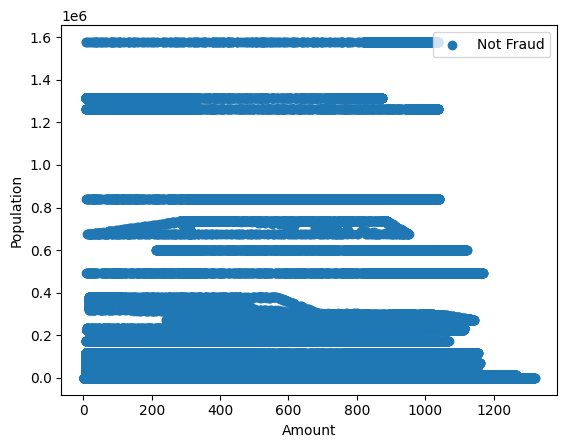

In [ ]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [43]:
resampling_methods = {
    'over' : RandomOverSampler(),
    'under' : RandomUnderSampler()
}

model_configs = {
    'log' : LogisticRegression(),
    'lasso' : LogisticRegression(penalty = 'l1',
                                C = 2., solver = 'liblinear'),
    'dtree' : DecisionTreeClassifier()
}


In [44]:
trained_models = {}

In [62]:
def calc_perf_metric(y_true, y_pred):
    
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    return(sensitivity,specificity,precision,recall,f1)

In [63]:
trained_models = {}
result = []

In [64]:
for resample_key,resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)
    
    for model_key ,model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X,resample_y)
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity,specificity,precision,recall,f1 = calc_perf_metric(y_test,y_pred)
        
        result.append({'Model':combined_key,
                      'Sensitivity':sensitivity,
                      'Specificity':specificity,
                      'Precision':precision,
                      'Recall':recall,
                      'f1':f1})
        

In [65]:
result_df = pd.DataFrame(result)

In [66]:
result_df

,Model,Sensitivity,Specificity,Precision,Recall,f1
0,over_log,0.771513,0.913781,0.035050,0.771513,0.067054
1,over_lasso,0.771513,0.913781,0.035050,0.771513,0.067054
2,over_dtree,0.554896,0.998675,0.629630,0.554896,0.589905
3,under_log,0.771513,0.921610,0.038416,0.771513,0.073188
4,under_lasso,0.771513,0.921622,0.038422,0.771513,0.073198
5,under_dtree,0.946588,0.945833,0.066238,0.946588,0.123811


In [48]:
trained_models

{'over_log': LogisticRegression(),
 'over_lasso': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'over_dtree': DecisionTreeClassifier(),
 'under_log': LogisticRegression(),
 'under_lasso': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'under_dtree': DecisionTreeClassifier()}